In [58]:
import pandas as pd

df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [59]:
df=df.dropna()
df.reset_index(inplace=True)
df.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [60]:
X1=df[['text']]
y1=df['label']
X1['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
18280    Rapper T. I. unloaded on black celebrities who...
18281    When the Green Bay Packers lost to the Washing...
18282    The Macy’s of today grew from the union of sev...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284      David Swanson is an author, activist, journa...
Name: text, Length: 18285, dtype: object

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import re

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nirmala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def low(x):
    return x.lower()

def remspace(x):
    return x.split()

def remstopwords(x):
    return [ps.stem(x) if x not in stopwords.words('english') else x] #.apply(lambda words: [word for word in words if word not in eng_stopwords])

def alpha(x):
    return re.sub('[^a-zA-Z]', ' ', str(x))

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

X1['text'] = X1['text'].apply(alpha)
X1['text'] = X1['text'].apply(low)
#X1['text'] = X1['text'].str.split()
#X1['text'] = X1['text'].apply(lambda x: '  '.join(x))
#X1['text'] = X1['text'].apply(lambda x: [ps.stem(i) for i in x if i not in stopwords.words('english')])

X1['text']
#for i in range(0, len(X1)):
#    review = re.sub('[^a-zA-Z]', ' ', X1['text'][i])
#    review = review.lower()
#    review = review.split()

#    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#    review = ' '.join(review)
#    corpus.append(review)

/var/folders/j7/pzqhsfrn3mg3dbz25rwmjkyr0000gn/T/ipykernel_8646/105586134.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['text'] = X1['text'].apply(alpha)
/var/folders/j7/pzqhsfrn3mg3dbz25rwmjkyr0000gn/T/ipykernel_8646/105586134.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['text'] = X1['text'].apply(low)


0        house dem aide  we didn t even see comey s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october     ...
3        videos    civilians killed in single us airstr...
4        print  an iranian woman has been sentenced to ...
                               ...                        
18280    rapper t  i  unloaded on black celebrities who...
18281    when the green bay packers lost to the washing...
18282    the macy s of today grew from the union of sev...
18283    nato  russia to hold parallel exercises in bal...
18284      david swanson is an author  activist  journa...
Name: text, Length: 18285, dtype: object

In [64]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(X1['text']).toarray()

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33, random_state=0)

accuracy:   0.871


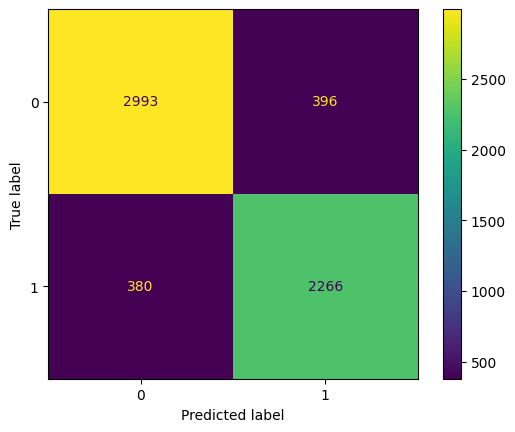

In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import itertools
import matplotlib.pyplot as plt

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()

plt.show()

In [74]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8714167357083679